In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data 만들기

In [2]:
np.random.seed(327)
features = np.zeros((30,3))
features[:,0] = 1.
features[:, 1:] = np.random.rand(30, 2)

$$\frac{3}{4} x_1 + x_2 - \frac{4}{5} = 0$$
다시 쓰면, 
$$x_2 = \frac{4}{5} - \frac{3}{4} x_1$$

In [3]:
w = np.array([-4./5., 3./4., 1.0])

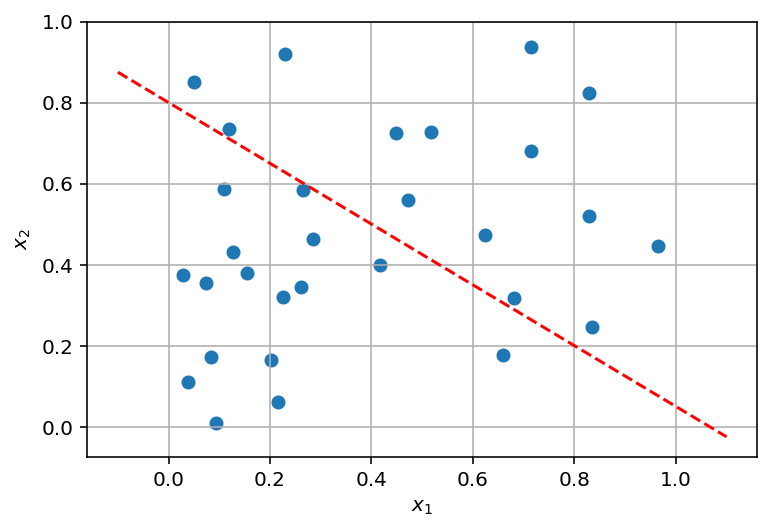

In [4]:
plt.scatter(features[:,1], features[:,2])
x1 = np.linspace(-.1, 1.1)
x2 = 4. / 5.  - 3. / 4. * x1
plt.plot(x1, x2, '--r')
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [5]:
labels = np.zeros(len(features))
labels[np.dot(features, w) > 0] = 1

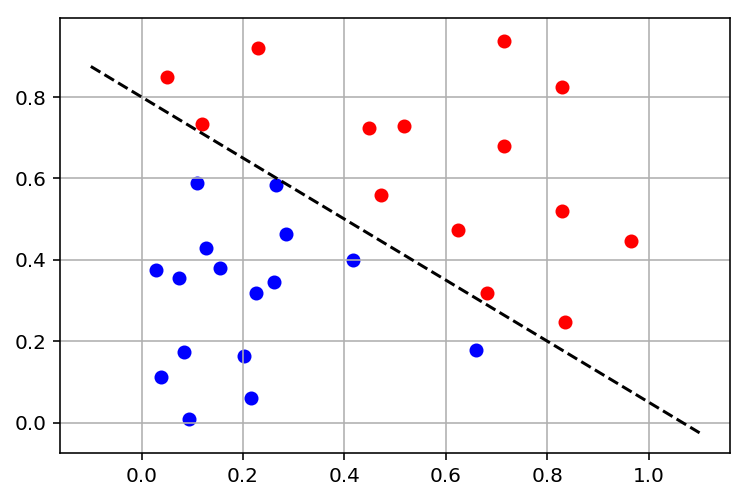

In [6]:
for k, color in [(0, 'b'), (1, 'r')]:
    idx = labels == k
    plt.scatter(features[idx, 1], features[idx, 2], c=color)

x1 = np.linspace(-.1, 1.1)
x2 = -w[1] / w[2] * x1  - w[0] / w[2]
plt.plot(x1, x2, '--k')

plt.grid()
plt.show()

## Feed Forward
$$y = \sigma(x\cdot W)$$
where
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

In [7]:
w0 = np.array([-0.5, 0.7, 1.8])

In [8]:
# TODO1 : Matrix/Vector multiplication
todo1_out = np.dot(features, w0)

In [9]:
np.testing.assert_array_almost_equal(todo1_out, np.array([ 1.1172906 ,  0.53402258,  1.22390556,  0.19330732,  0.78875462,
        1.17346402,  0.30542755,  0.52794582,  0.54884399, -0.06413071,
        0.23320688,  0.97782638,  0.51098053,  0.63402059,  0.73668692,
        1.68662909,  0.28106909, -0.41730228,  1.01458033,  0.19097579,
        0.36345836,  1.06505976,  1.56410043, -0.23806984,  0.83925937,
       -0.12982293, -0.27262993,  0.90340202,  0.29225019,  1.31651721]))
print("TODO1 : OK")

TODO1 : OK


In [10]:
# TODO2
sigmoid = lambda z: 1.0 / (1. + np.exp(-z))

In [11]:
your_answer = sigmoid(np.dot(features,w0))
np.testing.assert_array_almost_equal(your_answer, np.array([ 0.75348581,  0.63042083,  0.77275013,  0.5481769 ,  0.68756386,
        0.76377058,  0.57576879,  0.62900388,  0.63386735,  0.48397281,
        0.55803892,  0.72667671,  0.6250363 ,  0.65340056,  0.67627095,
        0.84378034,  0.56980831,  0.39716247,  0.73391557,  0.54759937,
        0.58987735,  0.74365628,  0.82694095,  0.44076206,  0.69830921,
        0.46758978,  0.43226157,  0.71164812,  0.57254693,  0.78860168]))
print("TODO2 : OK")

TODO2 : OK


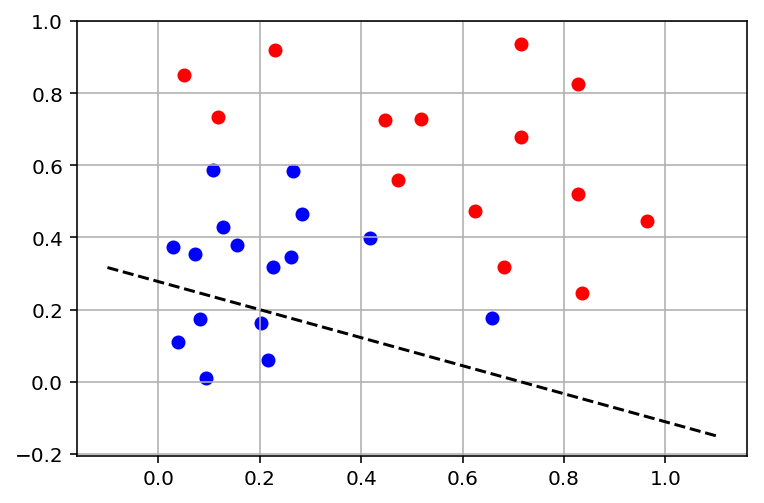

In [12]:
# plot scatters
for k, color in [(0, 'b'), (1, 'r')]:
    idx = labels == k
    plt.scatter(features[idx, 1], features[idx, 2], c=color)

# plot decision line
x1 = np.linspace(-.1, 1.1)
x2 = -w0[1] / w0[2] * x1  - w0[0] / w0[2]
plt.plot(x1, x2, '--k')

plt.grid()
plt.show()

## Model Comparison

In [13]:
def loss(w_, x_set, y_set):
    yhat = sigmoid(np.dot(x_set, w_))
    val = 0.
    for k in range(len(x_set)):
        xk = x_set[k]
        yk = y_set[k]
        val = val - yk * np.log(yhat[k]) - (1. - yk) * np.log(1. - yhat[k])
    return val / len(y_set)

In [14]:
print("Model 1 : score = {:4.2f}".format(loss(w, features, labels)))
print("Model 2 : score = {:4.2f}".format(loss(w0, features, labels)))

Model 1 : score = 0.56
Model 2 : score = 0.58


### Gradient Descent

In [15]:
def grad_loss(w_, x_set, y_set):
    yhat = sigmoid(np.dot(x_set, w_))
    val = np.zeros_like(w_)
    for k in range(len(x_set)):
        xk = x_set[k]
        yk = y_set[k]
        val = val - xk * (yk - yhat[k])
    return val / len(y_set)

In [16]:
from helper import gradient_descent
w2, path2 = gradient_descent(grad_loss, features, labels, w0, learning_rate=1.00, MaxIter=5000)

In [17]:
print(w0, loss(w0, features, labels))
print(w, loss(w, features, labels))
print(w2, loss(w2, features, labels))

[-0.5  0.7  1.8] 0.576046231617877
[-0.8   0.75  1.  ] 0.5566025754289313
[-4.32425011  4.71379122  5.2287417 ] 0.2447364236507049


In [18]:
print("Model 3 : score = {:4.2f}".format(loss(w2, features, labels)))

Model 3 : score = 0.24


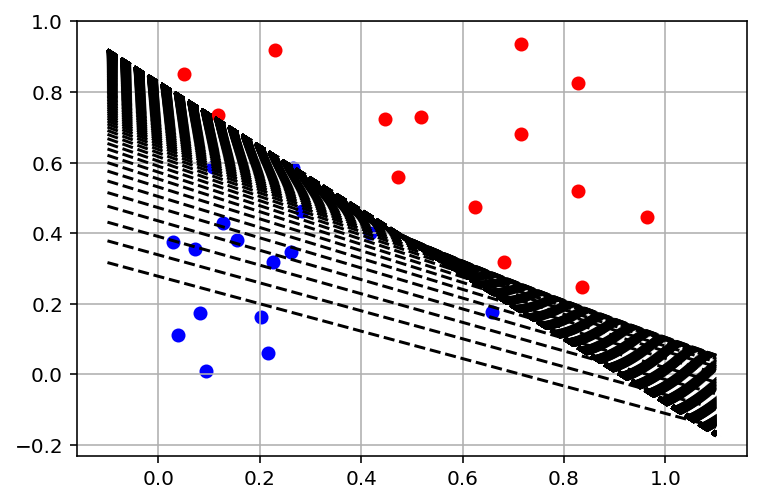

In [19]:
for k, color in [(0, 'b'), (1, 'r')]:
    idx = labels == k
    plt.scatter(features[idx, 1], features[idx, 2], c=color)

x1 = np.linspace(-.1, 1.1)
for k in range(0, len(path2), 20):
    x2 = -path2[k][1] / path2[k][2] * x1  - path2[k][0] / path2[k][2]
    plt.plot(x1, x2, '--k')

plt.grid()
plt.show()

In [20]:
X, Y = np.meshgrid(x1,x1)
Z = sigmoid(w2[0] + w2[1] * X + w2[2] * Y)

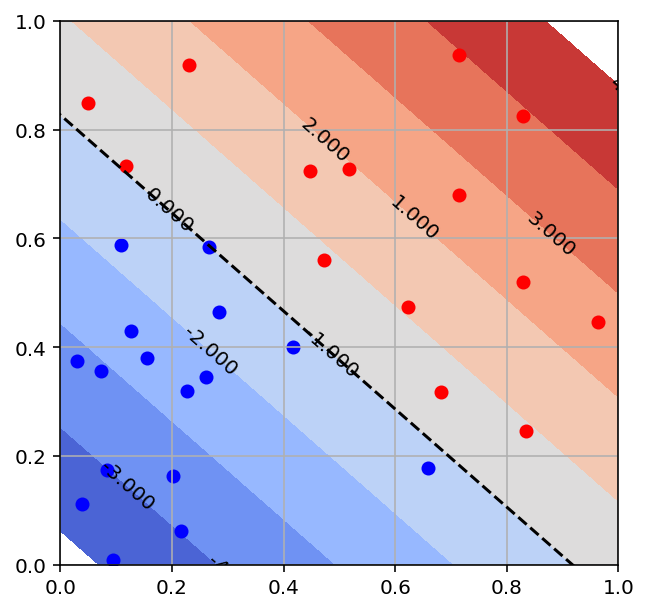

In [21]:
plt.figure(figsize=(5,5))
cs = plt.contourf(X, Y, w2[0] + w2[1] * X + w2[2] * Y, np.arange(-4, 6),cmap='coolwarm')
plt.clabel(cs, colors='k')
for k, color in [(0, 'b'), (1, 'r')]:
    idx = labels == k
    plt.scatter(features[idx, 1], features[idx, 2], c=color)
plt.xlim([0, 1])
plt.ylim([0, 1])

x1 = np.linspace(-.1, 1.1)
x2 = -w2[1] / w2[2] * x1  - w2[0] / w2[2]
plt.plot(x1, x2, '--k')

plt.grid()
plt.show()

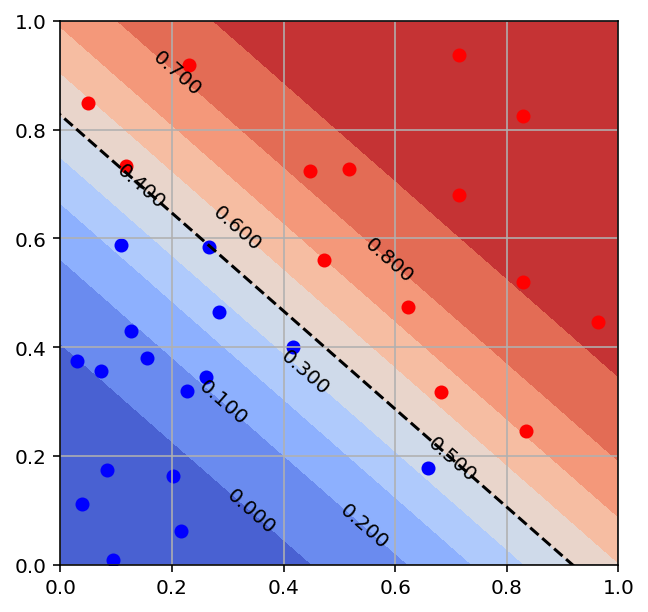

In [22]:
plt.figure(figsize=(5,5))
cs = plt.contourf(X, Y, Z, np.arange(0, 11) / 10,cmap='coolwarm')
plt.clabel(cs, colors='k')
for k, color in [(0, 'b'), (1, 'r')]:
    idx = labels == k
    plt.scatter(features[idx, 1], features[idx, 2], c=color)
plt.xlim([0, 1])
plt.ylim([0, 1])

x1 = np.linspace(-.1, 1.1)
x2 = -w2[1] / w2[2] * x1  - w2[0] / w2[2]
plt.plot(x1, x2, '--k')

plt.grid()
plt.show()

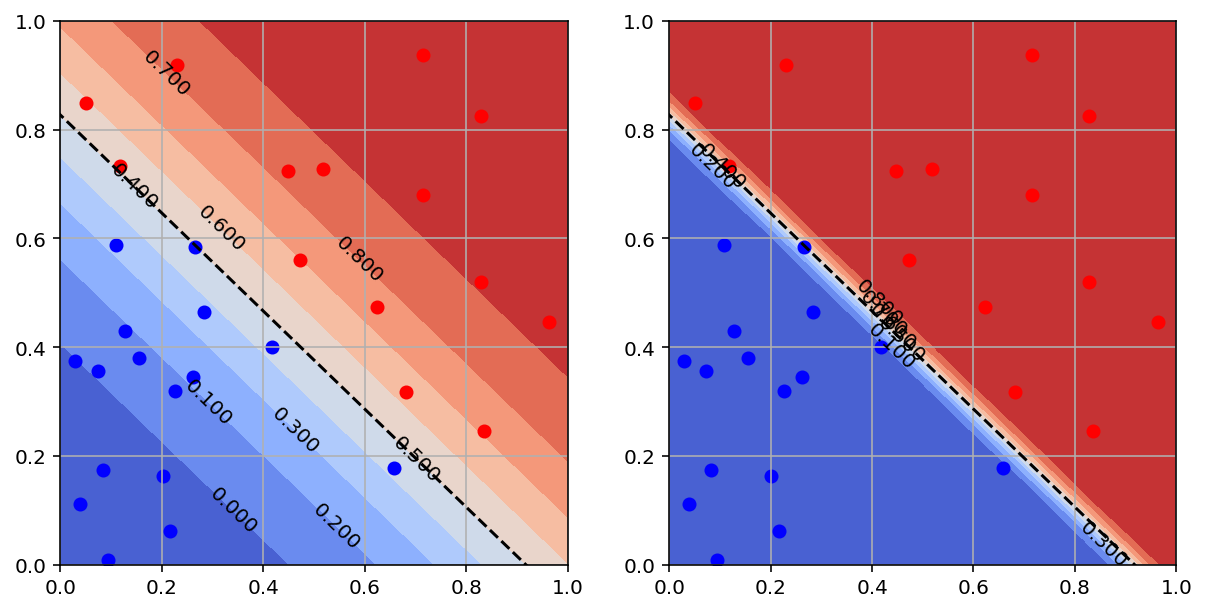

In [23]:
plt.subplots(2, figsize=(10,5))

# plot 1
plt.subplot(121)
Z = sigmoid(w2[0] + w2[1] * X + w2[2] * Y)
cs = plt.contourf(X, Y, Z, np.arange(0, 11) / 10,cmap='coolwarm')
plt.clabel(cs, colors='k')
for k, color in [(0, 'b'), (1, 'r')]:
    idx = labels == k
    plt.scatter(features[idx, 1], features[idx, 2], c=color)
plt.xlim([0, 1])
plt.ylim([0, 1])

x1 = np.linspace(-.1, 1.1)
x2 = -w2[1] / w2[2] * x1  - w2[0] / w2[2]
plt.plot(x1, x2, '--k')

plt.grid()

# plot 2
w_ = 10 * w2
Z = sigmoid(w_[0] + w_[1] * X + w_[2] * Y)
plt.subplot(122)
cs = plt.contourf(X, Y, Z, np.arange(0, 11) / 10,cmap='coolwarm')
plt.clabel(cs, colors='k')
for k, color in [(0, 'b'), (1, 'r')]:
    idx = labels == k
    plt.scatter(features[idx, 1], features[idx, 2], c=color)
plt.xlim([0, 1])
plt.ylim([0, 1])

x1 = np.linspace(-.1, 1.1)
x2 = -w_[1] / w_[2] * x1  - w_[0] / w_[2]
plt.plot(x1, x2, '--k')

plt.grid()

plt.show()

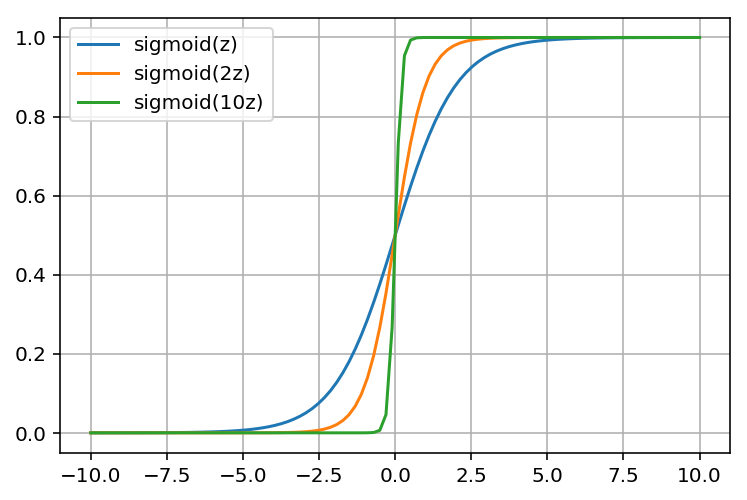

In [24]:
zz = np.linspace(-10, 10, 100)
plt.plot(zz, sigmoid(zz), label='sigmoid(z)')
plt.plot(zz, sigmoid(2* zz), label='sigmoid(2z)')
plt.plot(zz, sigmoid(10* zz), label='sigmoid(10z)')
plt.grid()
plt.legend()
plt.show()